In [2]:
# Import modules
from astropy.io import ascii
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib
#%matplotlib notebook
matplotlib.use('TkAgg')

# Data Preparation

In [3]:
def read_file(file_path, z):
    """
    Reads an ASCII file containing two columns: 
    observed wavelength and corresponding flux.
    
    Parameters:
    - file_path (str): The path to the ASCII file to be read.
    - z (float): galaxy redshift
    
    Returns:
    - name (str): The name of the supernova extracted from the file name.
    - date (str): The observation date extracted from the file name.
    - wavelengths (list of float): A list of observed wavelengths.
    - fluxes (list of float): A list of corresponding flux values.
    """
    file_name = os.path.basename(file_path)
    name = file_name.split("_")[0]
    date = file_name.split("_")[1]
    spec = ascii.read(file_path) 
    wv = spec['col1']/(1+z)
    flux = spec['col2']/np.mean(flux) #flux/1e-15
    return name, date, wv, flux

In [4]:
file_path = "/Users/pqt7tv/Dropbox/Computational_Astrophysics/ASTR5470_final_project/SN2012ap/spectra/SN2012ap_2012-02-14_18-57-36_SALT_RSS_None.flm"
z = 0.01224
name, date, wv, flux = read_file(file_path, z)

In [5]:
print(name)
print(date)
print(wv)
print(flux)

SN2012ap
2012-02-14
       col1       
------------------
 3165.558254465344
3167.4266708423993
3169.2950872194538
3171.1635035965187
 3173.031919973573
 3174.900336350628
 3176.768752727683
               ...
 8892.254450144204
  8894.12286652126
 8895.991282898323
  8897.85969927538
 8899.728115652433
 8901.596532029489
 8903.464948406543
Length = 3072 rows
        col2       
-------------------
           13.44618
-1.3405600000000002
           3.961965
           11.73311
-13.263829999999999
          -17.84879
          -16.94632
                ...
           3.717234
 3.3738070000000002
 3.4290930000000004
 3.4443639999999998
           3.708528
           3.878803
           3.720015
Length = 3072 rows


In [6]:
line = 'FeII5169'

# Select Region Around the Absorption

In [7]:
# Specify the Region of the Spectrum
def select_line(line):
    """
    Selects the region of the spectrum corresponding to a specified absorption 
    feature by returning its wavelength limits and rest wavelength.

    Parameters:
    - line (str): The name of the absorption feature for which the wavelength 
    limits are requested.

    Returns:
    - tuple: A tuple (w0, w1, rest_wavelength) representing the left and right 
    wavelength limits and the rest wavelength of the absorption feature. 
    If the specified line is not found in the predefined list, it returns 
    (0, 0, 0) as default values.
    """
    # Dictionary mapping absorption feature names to corresponding limits
    absorption_limits = {
        'CaII': (3550, 3900, 3945.),
        'SIIblue': (5000, 5650, 5454.),
        'SIIred': (5000, 5650, 5640.),
        'SiII': (6000, 6350, 6355.),
        'HeI4471': (4200, 4600, 4471.),
        'HeI5876': (5000, 6000, 5876.),
        'HeI6678': (6100, 6540, 6678.),
        'HeI7065': (6700, 7050, 7065),
        'HeI7281': (7000, 7300, 7281),
        'FeII5169': (4200, 5300, 5169),
        'FeII5018': (4750, 5000, 5018),
        'Halpha': (6000, 6400, 6564),
        'IR_CaII': (7500, 8500, 8579.),}

    return absorption_limits.get(line, (0, 0, 0))  # Default to zeros if line not found

wv_l, wv_h, lam_s = select_line(line)

# Customized structure of the Plot
def create_plot(title):
    """
    Create a customized plot for spectral analysis.

    Parameters:
    -title (str): Title for the plot.

    Returns:
    -matplotlib.figure.Figure: Initialized figure.
    """
    plt.figure(figsize=(15, 5))
    plt.minorticks_on()
    plt.tick_params('both', length=12, width=2, which='major', direction='in', top=True, right=False)
    plt.tick_params('x', length=8, width=1, which='minor', direction='in', top=True, right=False)
    plt.ylabel(r"Relative Flux", fontsize=18)
    plt.xlabel(r"Rest Wavelength [$\AA$]", size=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(title, fontdict={'fontsize': 15})
    return plt.gcf()

# Select the wavelength range around the absorption
def get_bounds():
    """
    Get wavelength bounds by selecting two points on a spectrum plot.

    Parameters:
        line (str): Line of interest (e.g., 'H-alpha', 'OII').
        row (int): Row index for the spectrum data.
        sn (dict): Dictionary containing spectrum data (e.g., 'Wavelength', 'Flux').
        z (float): Redshift.
        name (str): Name or identifier for the spectrum.
        //existing_plot (matplotlib.figure.Figure, optional): Existing plot to reuse.

    Returns:
        list: List of two selected points (x, y) on the plot.
    """
    plot = create_plot(f"{name}  date = {date}")
    plt.figure(plot.number)  # Activate the figure window
    msk = (wv > wv_l) & (wv < wv_h)
    wv_zoomed = wv[msk]
    flux_zoomed = flux[msk]
    plt.plot(wv_zoomed, flux_zoomed, label ='Zoomed-In Reduced Spectrum')
    plt.legend()

    x = plt.ginput(2, timeout=-1)  # Select two points (press Enter after each selection)

    return x 

# Returns the selected wavelength and corresponding flux
def selected_range():
    bounds = get_bounds()
    plt.scatter(bounds[0][0], bounds[0][1], c = 'red')
    plt.scatter(bounds[1][0], bounds[1][1], c = 'red')
    plt.draw()
    msk = np.logical_and(bounds[0][0] < wv, bounds[1][0] > wv)
    wvl_bins = np.argwhere(msk)
    wvc = wv[wvl_bins]
    fc = flux[wvl_bins]
    plt.plot(wvc, fc, c = 'red', label = 'Selected Region')
    plt.legend()
    return wvc, fc

In [8]:
wvc, fc = selected_range()

# Model Definition

We are fitting a Gaussian model to the absorption feature. There are four parameters in the fit: 

a = amplitude of the absorption feature

$\lambda_{o}$ = central wavelength of the absorption feature

$\sigma$ = standard deviation, determining the spread or width of the absorption

$\Delta w$ = wavelength-range parameter




$f(x) = a\times e^{-\frac{(\lambda - \lambda_{o})^2}{2\sigma^2}}$


where $\lambda$ = wavelengths at which the absorption is measured

In [9]:
def model(a, lambda_o, sigma, delta_w):
    """
    Define a Gaussian model for an absorption feature in spectral data.

    Parameters:
    - a (float): Amplitude of the absorption feature.
    - lambda_o (float): Central wavelength of the absorption feature.
    - sigma (float): Standard deviation, determining the spread or width of the absorption.
    - delta_w (float): Wavelength-range parameter.

    Returns:
    - msk (array-like): indices of the selected wavelength range
    - absorption_model (array-like): The Gaussian absorption model evaluated at the given wavelengths.
    """
    # Apply the wavelength range parameter
    lower_bound = lambda_o - (delta_w * 0.5)
    upper_bound = lambda_o + (delta_w * 0.5)
    msk = np.logical_and(wv >= lower_bound, wv <= upper_bound)
    lam = wv[msk]
    
    # Calculate the Gaussian absorption model
    absorption_model = -1* a * np.exp(-0.5 * ((lam - lambda_o) / sigma) ** 2) + (np.min(fc) + a)

    return msk , absorption_model

# Prior Distribution

probability distribution that represents the initial beliefs or assumptions about the parameters of a model before observing any data.

We assume uniform prior distribution for a, $\lambda_{o}$, and $\sigma$, and Gaussian prior distribution for $\Delta w$ following Modjaz et al. 2016. 

Uniform Probability Distribution:

$f(x|a, b) = \frac{1}{b - a}$

x = parameter

a = lower bound of the variable

b = upper bound of the variable

Gaussian Probability Distribution:

$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

f(x) = probability distribution of the parameter

$\mu$ = mean of the parameter

$\sigma$ = standard deviation or uncertainty on the parameter

In [10]:
def uniform_prior(low, high):
    """
    Uniform prior distribution function.

    Parameters:
    - low: Lower bound of the uniform distribution.
    - high: Upper bound of the uniform distribution.

    Returns:
    - pdf: Function representing the uniform prior probability density.
    """
    def pdf(x):
        if low <= x <= high:
            return 1 / (high - low)
        else:
            return 0
    return pdf

In [11]:
def gaussian_prior(mu, sigma):
    """
    This function returns a Gaussian prior distribution function.
    
    Parameters:
    - mu (float): the mean of the Gaussian prior.
    - sigma (float): the standard deviation of the Gaussian prior.
    
    Returns:
    - pdf: a function representing the Gaussian prior probability density.
    """
    def pdf(x):
        return (1/(sigma*np.sqrt(2*np.pi))) * np.exp((-0.5)*((x-mu)/sigma)**2)
    return pdf

In [12]:
def combined_prior(mu_low, mu_high, sigma_low, sigma_high, amp_low, amp_high, delta_w_mu, delta_w_sigma):
    """
    Combined prior distribution function for parameters: mu, sigma, amplitude, and delta_w.

    Parameters:
    - mu_low: Lower bound of the uniform distribution for mu.
    - mu_high: Upper bound of the uniform distribution for mu.
    - sigma_low: Lower bound of the uniform distribution for sigma.
    - sigma_high: Upper bound of the uniform distribution for sigma.
    - amp_low: Lower bound of the uniform distribution for amplitude.
    - amp_high: Upper bound of the uniform distribution for amplitude.
    - delta_w_mu: Float, the mean of the Gaussian prior for delta_w.
    - delta_w_sigma: Float, the standard deviation of the Gaussian prior for delta_w.

    Returns:
    - prior: Function representing the combined prior probability density.
    """
    mu_prior = uniform_prior(mu_low, mu_high)
    sigma_prior = uniform_prior(sigma_low, sigma_high)
    amp_prior = uniform_prior(amp_low, amp_high)
    delta_w_prior = gaussian_prior(delta_w_mu, delta_w_sigma)

    def prior(parameters):
        amp, mu, sigma, delta_w = parameters
        return mu_prior(mu) * sigma_prior(sigma) * amp_prior(amp) * delta_w_prior(delta_w)

    return prior

# Prior Choices following Modjaz et al. 2016:

a: a number between 0-3

$\lambda_{o}$ in terms of observed wavelength, $v_{o}$: Typical velocity range for absorption features in a core-collapse supernovae is 5,000-20,000km/s

$\sigma$ in terms of observed wavelength, $v_{o}$: 0-20,000 km/s, where positive
values refer to wider kernels. In Doppler broading, $\sigma_{\lambda} = \lambda_{s} \cdot \frac{\sigma_v}{c}$; $\lambda_{s}$ is the rest wavelength.

$\Delta w$: chosen wavelength range from the Zoomed-in spectrum

In [5]:
import numpy as np
def relativistic_doppler(velocity=None, wavelength=None, c=299792.458):
    """
    Convert between velocity and wavelength using the relativistic Doppler formula.

    Parameters:
    - velocity (float, optional): Velocity in km/s. Positive for recession velocity, negative for blueshift.
    - wavelength (float, optional): Wavelength in Angstroms. Positive for redshift, negative for blueshift.
    - c (float, optional): Speed of light in km/s. Default is the speed of light in vacuum.

    Returns:
    - float: The corresponding wavelength if velocity is given, or the corresponding velocity if wavelength is given.
    """
    lam_s = 5169
    if velocity is not None:
        # Calculate wavelength from velocity
        lam_o = lam_s * np.sqrt((1 + velocity / c) / (1 - velocity / c))
        return lam_o
    elif wavelength is not None:
        # Calculate velocity from wavelength
        velocity = c * ((wavelength / lam_s)**2 - 1) / ((wavelength / lam_s)**2 + 1)
        return velocity
    else:
        raise ValueError("Please provide either velocity or wavelength.")


In [9]:
print(relativistic_doppler(velocity = -60000))
print(relativistic_doppler(velocity = -5000))
print((5083.497427981712-4219.862150824346)/2)

4219.862150824346
5083.497427981712
431.8176385786828


In [14]:
c=299792.458
mu_low = relativistic_doppler(velocity = -20000)
mu_high = relativistic_doppler(velocity = -5000)
sigma_low = 0
sigma_high = lam_s * (20000/c)
amp_low = 0
amp_high = 3
delta_w_mu = 0
delta_w_sigma = (100/3)

In [15]:
prior = combined_prior(mu_low, mu_high, sigma_low, sigma_high, amp_low, amp_high, delta_w_mu, delta_w_sigma)

# Likelihood Function

Likelihood function tells how well the proposed parameters fit the observed data. Since we are fitting a Gaussian model to the absorption feature, the natural choice of the likelihood function would be the probability density function of a Gaussian distribution.  The likelihood function for a Gaussian distribution is:
$L(\mu, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)$
where $\mu$ is the mean, $\sigma^2$ is the variance, $x_{i}$ are the observational data. 

In [16]:
def likelihood(parameters):
    """
    Calculate the likelihood of the data given the parameters.
    
    Parameters:
    - parameters: array-like, containing [amplitude, central_wavelength, sigma, delta_w].
    
    Returns:
    - likelihood: float, the likelihood of the data given the parameters.
    """
    a, mu, sigma, delta_w = parameters
    
    msk, absorption_model = model(a, mu, sigma, delta_w)
    observed_data = flux[msk]
    # Calculate the likelihood as the product of probabilities at each wavelength
    epsilon = 1e-10  # Small epsilon to prevent division by zero
    likelihood = np.prod(np.exp(-0.5 * ((observed_data - absorption_model) / (sigma + epsilon)) ** 2)) / np.sqrt(2 * np.pi * (sigma**2 + epsilon))
    return likelihood

# MCMC Sampling

In [17]:
def proposal(initial_parameters, iterations, step_sizes):
    """Metropolis-Hastings algorithm to sample from the posterior distribution of parameters.
    
    Parameters:
    - initial_parameters: list, initial guesses for the parameters [amplitude, mu, sigma, delta_w].
    - iterations: int, number of iterations to run the algorithm.
    - step_sizes: list, step sizes for each parameter [amp_step, mu_step, sigma_step, delta_w_step].
    
    Returns:
    - samples: list of tuples, sampled parameter 
    values [amplitude, mu, sigma, delta_w] from the posterior distribution.
    """
    current_parameters = initial_parameters
    samples = []

    for _ in range(iterations):
        # Propose new parameters
        proposed_parameters = [np.random.normal(current_parameters[i], step_sizes[i]) for i in range(4)]
        proposed_parameters[3] = max(0, proposed_parameters[3])  # Enforce non-negativity
        # Compute the likelihood ratio
        acceptance_ratio = likelihood(proposed_parameters) / likelihood(current_parameters)
        
        # Accept or reject the proposal
        if acceptance_ratio >= 1 or np.random.uniform(0, 1) < acceptance_ratio:
            current_parameters = proposed_parameters
            samples.append(current_parameters)  # Only append accepted proposals
    print(len(samples))
    return samples

# Posterior Distribution

In the Metropolis-Hastings algorithm, after proposing new parameter values, we need to decide whether to accept or reject these proposed values. This decision is based on an acceptance ratio.
$\textbf{acceptance ratio, $\alpha$:}$ determines whether to accept or reject the proposed $\theta'$. Acceptance ratio $\alpha$ is defined by,
\begin{equation}
    \alpha(\theta,\theta') = min(1,\frac{p(\theta'|D)\cdot q(\theta|\theta')}{p(\theta|D)\cdot q(\theta'|\theta)})
\end{equation}
where $p(\theta'|D)$ is the posterior probability of the current parameters given the data, $q(\theta'|D)$ is the posterior probability of the proposed parameters given the data, $q(\theta'|\theta)$ is the probability of proposing $\theta'$ given $\theta$ from the proposal distribution, and  $q(\theta|\theta')$ is the probability of proposing $\theta$ given $\theta'$ from the proposal distribution.

In [18]:
def posterior_analysis(initial_param, num_iterations, likelihood, prior, proposal):
    """
    Perform posterior analysis using the Metropolis-Hastings MCMC algorithm.
    
    Parameters:
    - initial_param (float or array-like): The starting parameter value(s) for the MCMC algorithm.
    - num_iterations (int): The number of iterations to run the MCMC algorithm.
    - likelihood (function): A function that computes the likelihood of the data given a parameter.
    - prior (function): A function that computes the prior probability of a given parameter.
    - proposal (function): A function that suggests a new parameter value based on the current one.
    
    Returns:
    - accepted_samples (list): A list of accepted parameter values sampled from the posterior distribution.
    """
    current_param = initial_param
    samples = []
    for _ in range(num_iterations):
        step_sizes = [0.1, 10, 1, 1]
        proposed_params = proposal(current_param, 1000, step_sizes)
        #print(proposed_params)
        for proposed_param in proposed_params:
            prior_proposed = prior(proposed_param)
            prior_current = prior(current_param)
            likelihood_proposed = likelihood(proposed_param)
            likelihood_current = likelihood(current_param)
            acceptance_ratio = (likelihood_proposed * prior_proposed) / (likelihood_current * prior_current)
            if acceptance_ratio >= 1 or np.random.uniform(0, 1) < acceptance_ratio:
                current_param = proposed_param
            samples.append(current_param)  # Append only accepted proposal
    return samples

In [19]:
def set_inital_param():
    amp = 1.0
    mu = 5000
    sigma = 100
    delta_w = np.max(wvc)-np.min(wvc)
    init_param = [amp, mu, sigma, delta_w]
    return init_param

In [20]:
initial_param = set_inital_param()
num_iterations = 30
samples = posterior_analysis(initial_param, num_iterations, likelihood, prior, proposal)

990
997
998
994
997
995
1000
997
998
997
999
998
997
993
998
997
1000
998
999
999
998
997
994
996
991
994
997
994
994
990


In [21]:
print(samples)

[[1.0092434873153304, 4990.901745078057, 100.05976286734824, 567.3116651589005], [0.9579556562577229, 4993.3540083170155, 99.76666266447057, 568.360220449435], [0.9579556562577229, 4993.3540083170155, 99.76666266447057, 568.360220449435], [0.9579556562577229, 4993.3540083170155, 99.76666266447057, 568.360220449435], [0.9579556562577229, 4993.3540083170155, 99.76666266447057, 568.360220449435], [0.8920763394708763, 5001.6742330804445, 100.69694858384007, 572.0303160033641], [0.9719789970101305, 5015.690065063796, 100.23681702395996, 572.2776464246938], [1.0430807262401482, 5012.66046302025, 100.84721382010933, 571.9538113174486], [1.0496308641667715, 5022.961351596529, 100.17627796963276, 573.4357324382928], [1.1437686886173855, 5022.66980835339, 99.65954773771124, 574.1116768529819], [1.1852365786778902, 5028.9416137235785, 99.01357142608153, 572.9887541161256], [1.1491750424319978, 5018.569325307735, 100.87220051334188, 572.9350165851316], [1.00317564287916, 5007.07934013123, 100.9697

In [22]:
mcmc_samples_array = np.array(samples)

# Calculate the mean of each parameter
mean_amp = np.mean(mcmc_samples_array[:, 0])
mean_mu = np.mean(mcmc_samples_array[:, 1])
mean_sigma = np.mean(mcmc_samples_array[:, 2])
mean_delta_w = np.mean(mcmc_samples_array[:, 3])

print("Mean amplitude:", mean_amp)
print("Mean mu:", mean_mu)
print("Mean sigma:", mean_sigma)
print("Mean delta_w:", mean_delta_w)

Mean amplitude: 1.6952941414538687
Mean mu: 4979.213785866224
Mean sigma: 114.06702822609599
Mean delta_w: 448.62548669884126


In [23]:
msk, gauss_model = model(1.7807656900037467, 4934.496944139456 , 119.57455237770826, 486.98306245932775)

In [24]:
plt.plot(wv[msk], gauss_model)
plt.draw()

In [23]:
def plot_trace(parameter_samples, parameter_names):
    """
    Plot the trace plots for MCMC parameters.
    
    Parameters:
    - parameter_samples (list of lists): List of parameter samples from the MCMC chain.
    - parameter_names (list of str): List of parameter names.
    """
    num_params = len(parameter_names)
    iterations = len(parameter_samples)
    
    fig, axes = plt.subplots(num_params, 1, figsize=(8, 4*num_params))
    
    for i in range(num_params):
        param_samples = [sample[i] for sample in parameter_samples]
        axes[i].plot(np.arange(iterations), param_samples, color='blue', alpha=0.6)
        axes[i].set_xlabel('Iteration')
        axes[i].set_ylabel(parameter_names[i])
        axes[i].set_title(f'Trace plot of {parameter_names[i]}')
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

In [ ]:
plot_trace(samples, ['amp', 'mu', 'sigma', 'wv range'])

In [2]:
pip install arviz

  Obtaining dependency information for arviz from https://files.pythonhosted.org/packages/a6/ca/8757cc665f6faedea669ef7e5310de32fa693ac0974b993201c9fce2a863/arviz-0.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for dm-tree>=0.1.8 from https://files.pythonhosted.org/packages/08/e2/4c29cb9876456517f21979ddcbb6048f28a3b52c61aa9d14d42adafcdca4/dm_tree-0.1.8-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for h5netcdf>=1.0.2 from https://files.pythonhosted.org/packages/68/2d/63851081b19d1ccf245091255797cb358c53c886609b5056da5457f7dbbf/h5netcdf-1.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for xarray-einstats>=0.3 from https://files.pythonhosted.org/packages/4a/61/1471d0738051be02bea0d84350026f01bfea4d9e9df76c560d7d915b3a9f/xarray_einstats-0.7.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 2.9 MB/s 

In [3]:
pip install lmfit

  Obtaining dependency information for lmfit from https://files.pythonhosted.org/packages/96/d7/1197e2b3e3e2ce52fda5fc2eb0463779cee7a9da1cf63854dffae5a6efff/lmfit-1.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for asteval>=0.9.28 from https://files.pythonhosted.org/packages/b0/f9/2d6aed51125d4b5b7279ae98b51d9c9c906b8217269b117a000de50727a6/asteval-0.9.32-py3-none-any.whl.metadata
  Obtaining dependency information for uncertainties>=3.1.4 from https://files.pythonhosted.org/packages/13/f7/9d94eeea3f6475456fb5c6b72d3a3cc652c1ecd342c5491274cbfc9ebaab/uncertainties-3.1.7-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 231.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 2.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
date = np.array(['2012-02-14', '2012-02-16', '2012-02-18'])
p_vel = np.array[-15000, -16000, -15000]
p_unc = np.array[4500, 4800, 4700]
my_vel = np.array([-22429.566899624526, -29384.51238562164, -23011.800691952445])
my_unc = np.array([1.8713397224546031, 2.0757422202688547, 2.5442213667137494])
lm_vel = np.array([-22899.42541084843, -22992.804406059648, -24192.740227069342])
lm_unc = np.array([0.019885715959004457, 0.1855008602142334, 0.024243746427139005])

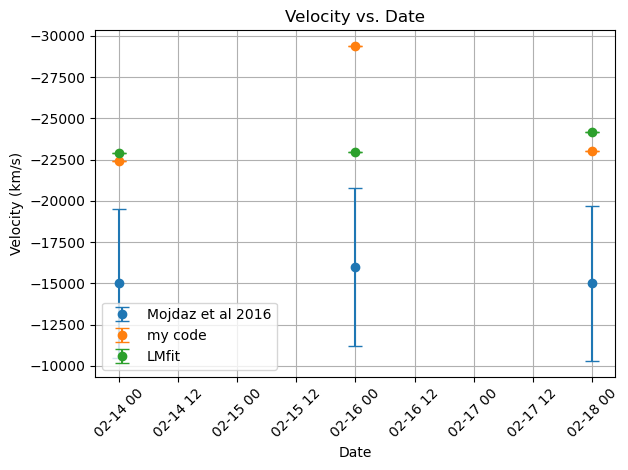

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Data
date = np.array(['2012-02-14', '2012-02-16', '2012-02-18'])
p_vel = np.array([-15000, -16000, -15000])
p_unc = np.array([4500, 4800, 4700])
my_vel = np.array([-22429.566899624526, -29384.51238562164, -23011.800691952445])
my_unc = np.array([1.8713397224546031, 2.0757422202688547, 2.5442213667137494])
lm_vel = np.array([-22899.42541084843, -22992.804406059648, -24192.740227069342])
lm_unc = np.array([0.019885715959004457, 0.1855008602142334, 0.024243746427139005])

# Convert date strings to datetime objects
dates = [datetime.strptime(date_str, '%Y-%m-%d') for date_str in date]

# Plot
plt.errorbar(dates, p_vel, yerr=p_unc, label='Mojdaz et al 2016', fmt='o', capsize=5)
plt.errorbar(dates, my_vel, yerr=my_unc, label='my code', fmt='o', capsize=5)
plt.errorbar(dates, lm_vel, yerr=lm_unc, label='LMfit', fmt='o', capsize=5)

# Formatting
plt.xlabel('Date')
plt.ylabel('Velocity (km/s)')
plt.title('Velocity vs. Date')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().invert_yaxis()  # Invert y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(True)

# Show plot
#plt.show()
plt.savefig('2012ap.png')

In [8]:
import numpy as np

def relativistic_doppler(velocity, rest_wavelength):
    c = 299792.458  # Speed of light in km/s
    beta = velocity / c  # Velocity as a fraction of the speed of light
    gamma = 1 / np.sqrt(1 - beta**2)  # Lorentz factor
    observed_wavelength = rest_wavelength * gamma * (1 + beta)  # Relativistic Doppler formula
    return observed_wavelength

def get_wavelength_from_velocity(velocity, rest_wavelength):
    observed_wavelength = relativistic_doppler(velocity, rest_wavelength)
    return observed_wavelength

# Example usage
rest_wavelength = 5169  # Angstroms (example rest wavelength)
velocity = -20000  # km/s (example velocity)
observed_wavelength = get_wavelength_from_velocity(velocity, rest_wavelength)
print("Observed Wavelength:", observed_wavelength, "Angstroms")

Observed Wavelength: 4834.932612380226 Angstroms
